<a href="https://colab.research.google.com/github/celacarney/Linear-Algebra-Projects/blob/main/EdinaHomePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# Reading data in from COLAB file system
EdinaHomePrices <- read_csv("/content/redfin_edina_data.csv")

Rows: 115 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): SALETYPE, PROPERTYTYPE, ADDRESS, CITY, STATE, LOCATION, URL, SOURCE
dbl (12): ZIPCODE, PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, DAYSO...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
#Look at data
head(EdinaHomePrices)

SALETYPE,PROPERTYTYPE,ADDRESS,CITY,STATE,ZIPCODE,PRICE,BEDS,BATHS,LOCATION,SQUAREFEET,LOTSIZE,YEARBUILT,DAYSONMARKET,$/SQUARE FEET,HOA/MONTH,URL,SOURCE,LATITUDE,LONGITUDE
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
MLS Listing,Single Family Residential,5621 Chowen Ave S,Edina,MN,55410,1199000,5,4,Edina,3377,8189,2016,1,355,NA,https://www.redfin.com/MN/Edina/5621-Chowen-Ave-S-55410/home/49922668,NORTHSTARMLS,44.90073,-93.32486
MLS Listing,Single Family Residential,4229 Grimes Ave S,Edina,MN,55416,2295000,4,4,Edina,3685,10018,2023,2,623,NA,https://www.redfin.com/MN/Minneapolis/4229-Grimes-Ave-S-55416/home/50153504,NORTHSTARMLS,44.92493,-93.33387
MLS Listing,Single Family Residential,7113 Cornelia Dr,Edina,MN,55435,648000,4,3,Edina,2166,10454,1963,4,299,NA,https://www.redfin.com/MN/Minneapolis/7113-Cornelia-Dr-55435/home/51489411,NORTHSTARMLS,44.87432,-93.33555
MLS Listing,Single Family Residential,7208 Fleetwood Dr,Edina,MN,55439,1200000,6,4,Edina,4007,13939,1973,4,299,NA,https://www.redfin.com/MN/Minneapolis/7208-Fleetwood-Dr-55439/home/51328170,NORTHSTARMLS,44.87218,-93.37105
MLS Listing,Single Family Residential,312 Harrison Ave S,Edina,MN,55343,329900,3,2,Edina,1223,6969,1946,4,270,NA,https://www.redfin.com/MN/Hopkins/312-Harrison-Ave-S-55343/home/51486270,NORTHSTARMLS,44.91962,-93.39256
MLS Listing,Single Family Residential,6305 Concord Ave,Edina,MN,55424,798500,4,3,Edina,2544,9583,1957,4,314,NA,https://www.redfin.com/MN/Edina/6305-Concord-Ave-55424/home/51483022,NORTHSTARMLS,44.88867,-93.34389


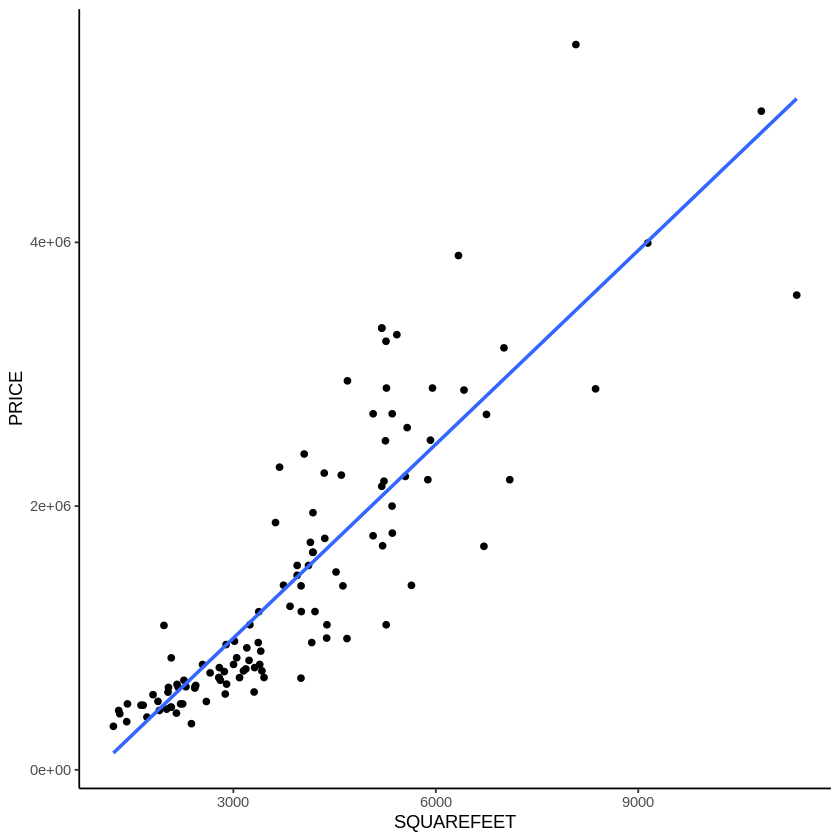

In [6]:
#Scatterplot with simple linear regression line
ggplot(data=EdinaHomePrices, aes(x=SQUAREFEET,y=PRICE)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  #adding a regression line to the plot without the standard error bands 
  theme_classic()